In [1]:
# Reading in the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
trainData = pd.read_csv('../data/1e7data_train.csv', index_col=0)
testData = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4465,True,1.000000e+07,10000000.0,0.000015,0.021544,0.049234,0.010924,0.011821,2.166832,0.011453,...,0.000584,0.025326,0.000058,0.010939,0.000067,0.000212,0.000205,0.001258,0.002236,0.004439
4231,False,5.556366e+05,10000000.0,0.000015,0.021544,0.043888,0.009194,0.004916,-1.426257,0.007699,...,0.000374,0.155129,0.000066,0.002199,0.000106,0.000375,0.000007,0.034136,0.000070,0.000463
487,False,1.955824e+06,10000000.0,0.000015,0.021544,0.056372,0.013384,0.006294,-0.410190,0.003253,...,0.000039,0.023756,0.000583,0.002526,0.000630,0.003254,0.000256,0.000608,0.000759,0.000256
2210,False,4.607903e+03,10000000.0,0.000015,0.021544,0.054535,0.012735,0.007372,-1.748617,0.015612,...,0.000702,0.005107,0.000400,0.006366,0.005785,0.000889,0.000212,0.000663,0.000126,0.000314
4390,True,1.000000e+07,10000000.0,0.000015,0.021544,0.042994,0.008915,0.009054,2.988464,0.013263,...,0.000565,0.008115,0.000088,0.010731,0.000342,0.000861,0.000082,0.001282,0.000835,0.000491


In [2]:
# Adding the hill radius to the data:
def HillSep(system):
    return (system['a2']-system['a1'])/(system['a1']*system['RH/a'])
df['HillSep'] = df.apply(HillSep, axis=1)
dftest['HillSep'] = dftest.apply(HillSep, axis=1)
dftest.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3,HillSep
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,1.000000e+07,10000000.0,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0.007353,0.000124,0.016611,0.002061,0.000299,0.000081,0.000301,0.001068,0.001251,6.879240
3471,False,8.233677e+05,10000000.0,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.004332,0.000179,0.015675,0.000293,0.000242,0.000046,0.000635,0.000009,0.000270,8.496936
3849,False,7.204145e+03,10000000.0,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.041751,0.000054,0.036828,0.000012,0.006989,0.000762,0.002772,0.000394,0.001563,6.822671
3537,False,5.851915e+03,10000000.0,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.091574,0.000048,0.015606,0.000246,0.004709,0.000930,0.008343,0.000694,0.000366,5.092680
4214,False,6.435885e+06,10000000.0,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.065076,0.000003,0.018345,0.000280,0.000247,0.000108,0.009791,0.001519,0.002027,8.928228


In [3]:
# choosing the appropriate features:
features = ['HillSep']
for i in ['1', '2', '3']:
    #columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i, 'x'+i, 'y'+i, 'z'+i, 'vx'+i, 'vy'+i, 'vz'+i]
    features += ['P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]

y = df['Stable']
X = df[features]
X.head()

,HillSep,P1,e1,pomega1,inc1,Omega1,f1,P2,e2,pomega2,inc2,Omega2,f2,P3,e3,pomega3,inc3,Omega3,f3
Sim_ID,,,,,,,,,,,,,,,,,,,
2414,8.989360,0.013449,0.008127,-4.462116,0.003942,-3.134668,1.949717,0.017539,0.016039,-4.172961,0.002068,-1.855286,1.462877,0.021633,0.006592,1.995330,0.010630,2.969187,-1.685085
4056,5.924768,0.011447,0.005201,4.606446,0.009269,2.392131,-3.975319,0.013707,0.015913,1.059685,0.000349,1.279611,1.308241,0.016025,0.007400,-3.935502,0.009493,-1.889784,-0.745085
4855,7.241825,0.012241,0.004883,0.605644,0.000564,0.316897,1.688171,0.015214,0.010873,0.453809,0.016510,-0.394784,-2.362605,0.019525,0.005741,-5.758388,0.005166,-2.642989,0.399412
517,8.840869,0.013338,0.008056,1.245784,0.007544,1.086138,-1.006037,0.017325,0.006096,0.791898,0.002616,-0.707993,-3.734544,0.022566,0.016438,-0.505355,0.015843,1.975103,-0.395186
1520,5.908519,0.010603,0.012062,-0.577740,0.005068,-1.083953,-0.133573,0.012690,0.006588,0.348393,0.012850,-2.202099,-1.864266,0.014832,0.012144,0.102143,0.000987,-2.638114,-3.562545


In [4]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import ipywidgets as widgets
from ipywidgets import FloatSlider, fixed
from ipywidgets.widgets.widget_selection import SelectionSlider

ImportError: No module named xgboost

This function, adapted from Diana's notebook, does CV on the passed model, and prints out the optimal number of iterations for the adopted hyperparameters (`xgb.cv` will run up to `n_estimators` rounds, but if the CV score doesn't improve in `early_stopping_rounds` rounds, it will stop, and will return the sequence of CV scores with the last 50 cut out).

In [5]:
def optimize_n_estimators(model, df, features, cv_folds=5, early_stopping_rounds=50):
    # xgb.cv performs CV at each boosting iteration, and stops when CV score doesn't improve, 
    # so we can use it to set the optimal number of boosting rounds num_boost_round (n_estimators)
    xgb_param = model.get_xgb_params()
    xgtrain = xgb.DMatrix(df[features].values, label=df['Stable'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds)
    
    testmeanauc = cvresult.tail(1).values[0,0]
    teststdauc = cvresult.tail(1).values[0,1]
    optimal_n_estimators = cvresult.index.values[-1]
    
    print("Learning Rate: {0}".format(model.learning_rate))
    print("CV score: {0} +/ {1}".format(testmeanauc, teststdauc/np.sqrt(cv_folds)))
    print("Optimal number of iterations (n_estimators) = {0}.".format(optimal_n_estimators))

The lower `n_estimators` is, the faster the models will train, so we want to pick a reasonably small value at first to optimize in the high dimensional hyperparameter space.  The lower the `learning_rate`, the more rounds (`n_estimators`) it needs to run.  `learning_rate` goes from [0,1], so let's see how many rounds we have to run at the high end of that range:

In [6]:
model = XGBClassifier(seed=27, n_estimators=10000)
learning_rates = np.linspace(0.05, 0.5, 10)
for learning_rate in learning_rates:
    model.set_params(learning_rate=learning_rate)
    optimize_n_estimators(model, df, features)

ValueError: Check your params.Early stopping works with single eval metric only.

`learning_rate` = 0.2 does almost as well as 0.1, so let's run that one.  Let's choose a slightly higher `n_estimators` since as we vary the other parameters, 131 will no longer be the optimal value:

In [10]:
model.set_params(learning_rate=0.2, n_estimators=200)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

I next tried to optimize `max_depth` and `min_child_weight` simultaneously.  This is not what Kristen suggested, but I was playing around and seeing as this data set is so tiny, there's no computational bottleneck at all.  `max_depth` is the depth of the trees, and we only have about 20 features, so don't need to test values > 20.

Here I set the ranges for the parameters

In [11]:
Nfolds = 5
max_depth = [6,12,18]
min_child_weight = np.logspace(-1,2,5)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=Nfolds)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

I wrote some functions to help visualize the results

In [12]:
%matplotlib inline
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotgrid(grid, vmin, vmax, midpoint):
    param_grid = grid.param_grid
    
    # get the names of the parameters
    param1 = param_grid.keys()[0]
    param2 = param_grid.keys()[1]

    # plot the scores of the grid
    # grid_scores_ contains parameter settings and scores
    # We extract just the scores
    scores = np.fabs([x[1] for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param1]), len(param_grid[param2]))

    plt.figure(figsize=(12, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint))
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid[param2])), np.round(param_grid[param2], decimals=2))
    plt.yticks(np.arange(len(param_grid[param1])), np.round(param_grid[param1], decimals=2))
    plt.title('CV Score')
    plt.show()
       
def plot1dcut(grid, param_names, fixed_param_name, fixed_value_name):
    fixed_value = float(fixed_value_name)
    param_grid = grid.param_grid
    
    # Each entry x in grid.grid_scores_ has all the CV scores in x[2]
    scores = np.fabs([np.mean(x[2]) for x in grid.grid_scores_])
    stds = np.fabs([np.std(x[2]) for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    stds = np.array(stds).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    
    plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    
    if fixed_param_name == param_names[0]:
        xvals = param_grid[param_names[1]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[mask,:].flatten()
        errs = stds[mask,:].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[1])

    elif fixed_param_name == param_names[1]:
        xvals = param_grid[param_names[0]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[:,mask].flatten()
        errs = stds[:,mask].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[0])

    ax.errorbar(xvals, yvals, errs)
    ax.set_ylabel('CV score')
    ax.set_title("{0} = {1}".format(fixed_param_name, fixed_value))
    plt.show()

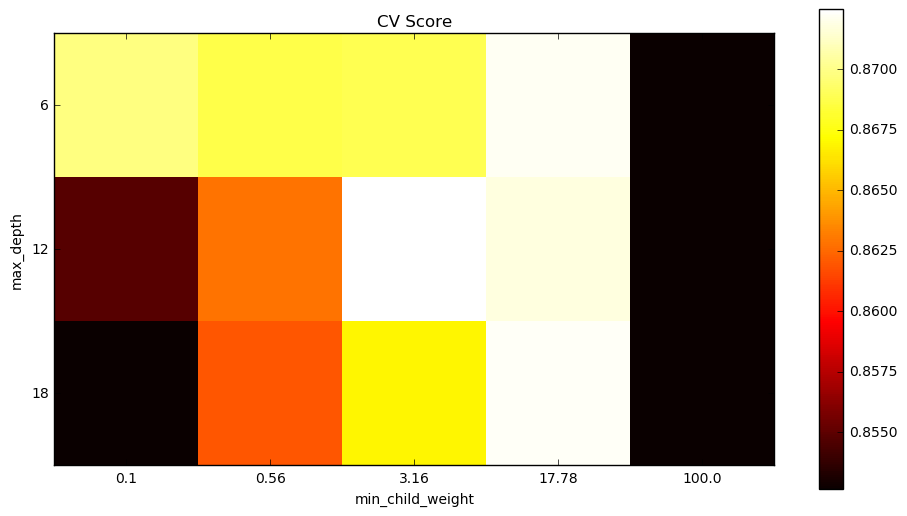

In [13]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

The sliders allow you to change the color scales so you're not swamped by terrible scores or have trouble discerning nearby CV scores.  Here the grid is very coarse, so don't need to use it.  

Now we tighten the grid a bit:

In [14]:
max_depth = [4,6,8,10,12,14,16]
min_child_weight = np.logspace(np.log10(3),np.log10(50), 10)

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

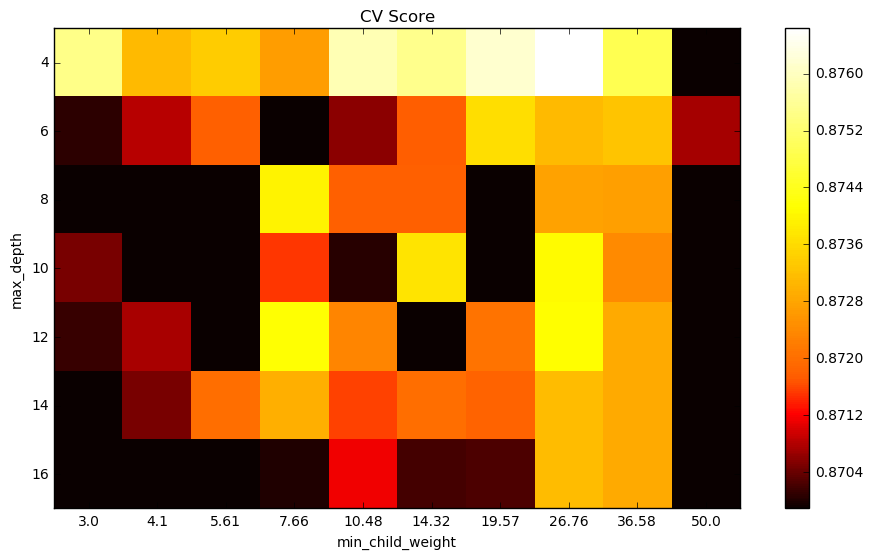

In [15]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

Here the sliders help a bit more.  Looks like `max_depth = 12`, `min_child_weight`=30 is a region with good scores.  The widgets below allow you to look at 1D cuts through the 2D plot above:

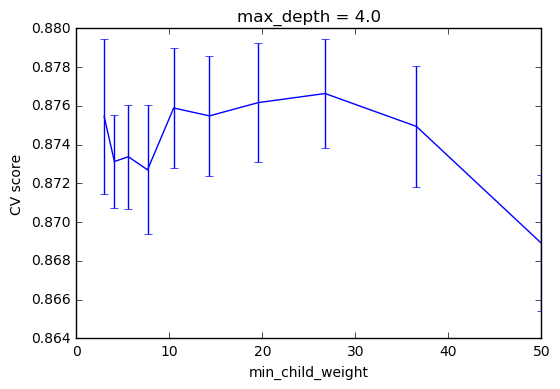

<function __main__.plot1dcut>

In [16]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

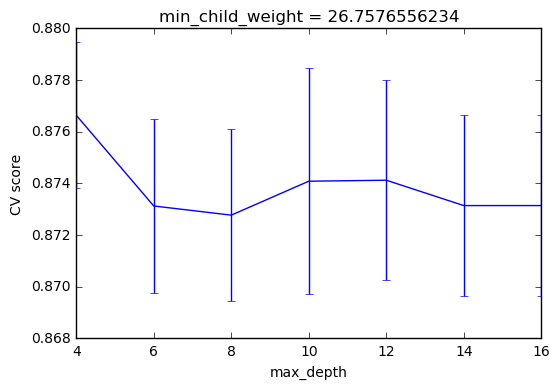

In [17]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

Lower values of max_depth and higher values of min_child_weight help avoid overfitting, but if you go too far the model will do badly.  So I think we want to go with more conservative values.  Here it seems like max_depth of 4 does well, which I think suggests we don't have many features that will help the algorithm!  So let's choose:

In [21]:
model.set_params(max_depth=4, min_child_weight=27)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=4,
       min_child_weight=27, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1)

In [22]:
subsample = np.linspace(0.5,1,10)
colsample_bytree = np.linspace(0.5,1,10)

param_grid = dict(subsample=subsample, colsample_bytree=colsample_bytree)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='roc_auc',iid=False, cv=5)
grid.fit(df[features],df['Stable'])

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

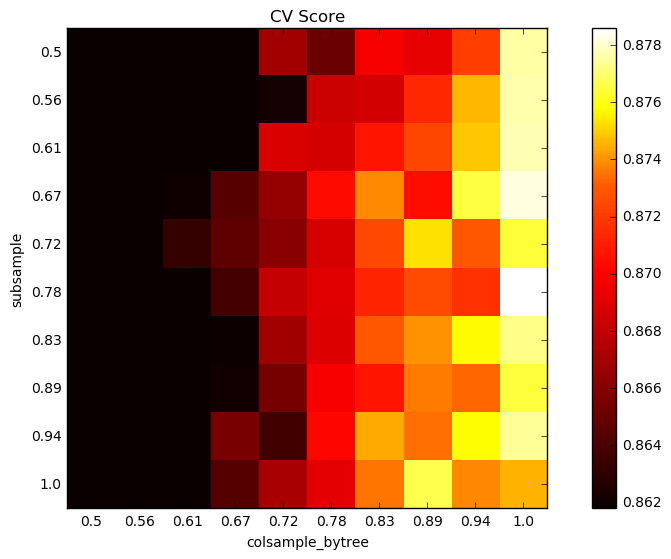

In [23]:
# get the scores and values for the sliders
scores = np.fabs([x[1] for x in grid.grid_scores_])
vmin = np.min(scores)
vmax = np.max(scores)
mean = np.mean(scores)
step = (vmax-vmin)/100.

widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

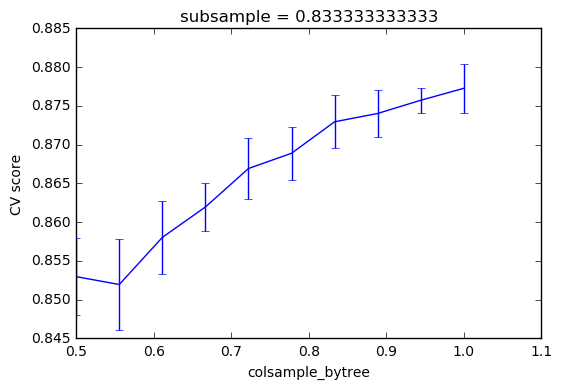

In [24]:
fixed_param=param_names[0]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

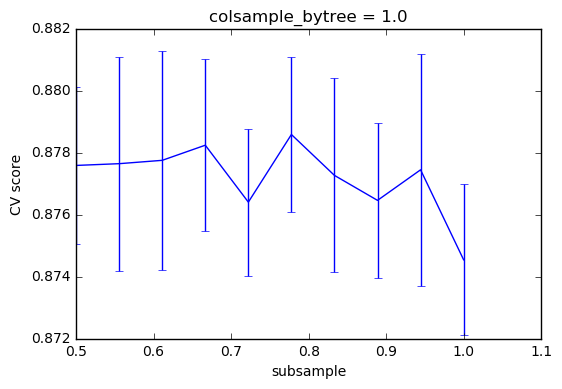

In [25]:
fixed_param=param_names[1]
widgets.interact(plot1dcut, grid=fixed(grid), param_names = fixed(param_names), fixed_param_name = fixed(fixed_param), fixed_value_name=SelectionSlider(description=fixed_param, options=param_val_names[fixed_param]))

We choose the approximate maximum:

In [26]:
model.set_params(subsample=0.8, colsample_bytree=1.)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1.0,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=4,
       min_child_weight=27, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

Now we lower the `learning_rate` (so we have to raise `n_estimators`) to get a slightly better model:

In [27]:
model.set_params(n_estimators=10000)
learning_rates = np.logspace(-3, -0.5, 10)
for learning_rate in learning_rates:
    model.set_params(learning_rate=learning_rate)
    optimize_n_estimators(model, df, features)

Learning Rate: 0.001
CV score: 0.7865422 +/ 0.0055665632083
Optimal number of iterations (n_estimators) = 113.
Learning Rate: 0.00189573565241
CV score: 0.8755502 +/ 0.00450237832617
Optimal number of iterations (n_estimators) = 8425.
Learning Rate: 0.0035938136638
CV score: 0.8758194 +/ 0.00465903632611
Optimal number of iterations (n_estimators) = 4596.
Learning Rate: 0.00681292069058
CV score: 0.8776398 +/ 0.00440929093982
Optimal number of iterations (n_estimators) = 3206.
Learning Rate: 0.0129154966501
CV score: 0.8770096 +/ 0.00494514404724
Optimal number of iterations (n_estimators) = 1469.
Learning Rate: 0.0244843674682
CV score: 0.8775126 +/ 0.00409853829164
Optimal number of iterations (n_estimators) = 831.
Learning Rate: 0.0464158883361
CV score: 0.876484 +/ 0.00419835124781
Optimal number of iterations (n_estimators) = 520.
Learning Rate: 0.0879922543569
CV score: 0.8759396 +/ 0.00487906214431
Optimal number of iterations (n_estimators) = 248.
Learning Rate: 0.16681005372
C

So this is probably close to our best model:

In [28]:
model.set_params(learning_rate=0.005, n_estimators=10000)
optimize_n_estimators(model, df, features)

Learning Rate: 0.005
CV score: 0.877693 +/ 0.00444162245131
Optimal number of iterations (n_estimators) = 4122.



Model Report
Accuracy : 0.8233
AUC Score (Test): 0.876819


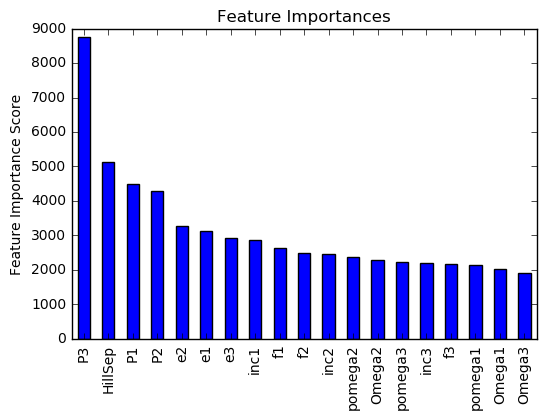

In [29]:
model.fit(df[features], df['Stable'],eval_metric='auc')
        
#Predict training set:
dtrain_predictions = model.predict(df[features])
dtest_predictions = model.predict(dftest[features])
dtrain_predprob = model.predict_proba(df[features])[:,1]
dtest_predprob = model.predict_proba(dftest[features])[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [39]:
y_pred=model.predict_proba(dftest[features])

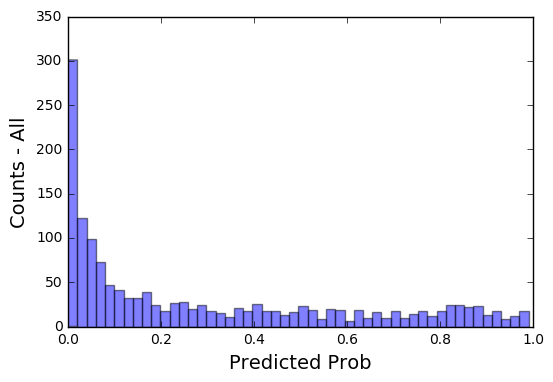

In [40]:
fig, ax= plt.subplots()
ax.hist(y_pred[:,1], bins=50, alpha=0.5)
ax.set_xlabel('Predicted Prob', fontsize=14)
ax.set_ylabel('Counts - All', fontsize=14)
plt.show()

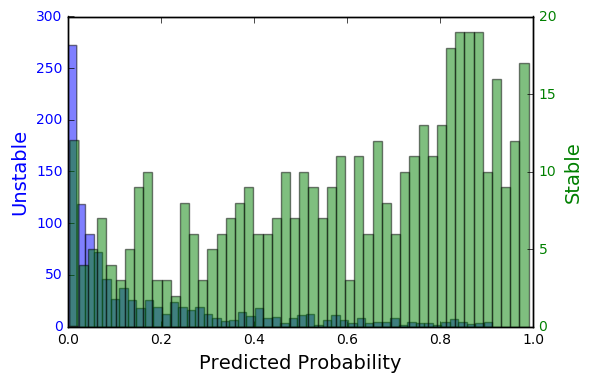

In [50]:
# Histogram:

bins = 50
y_pred=model.predict_proba(dftest[features])
Stable=y_pred[dftest['Stable'].values][:,1]
Unstable=y_pred[~dftest['Stable'].values][:,1]


#df['Predict'].loc[df['Truth']==1]

fig, ax1 = plt.subplots()
ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue')
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
#ax1.set_ylim(ax2.get_ylim())


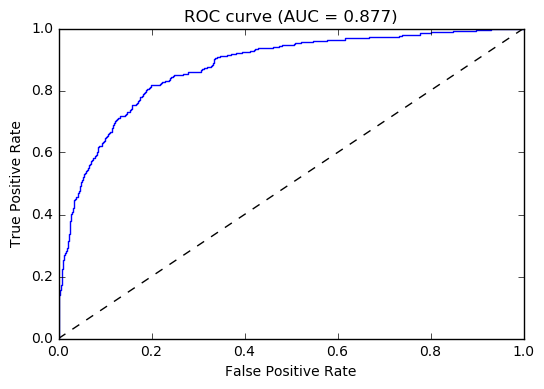

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(dftest['Stable'], dtest_predprob)))

In [45]:
for i in range(0,len(fpr), 10):
    print("Threshold {0}, FPR = {1}, TPR = {2}".format(thresholds[i], fpr[i], tpr[i]))

Threshold 0.990646123886, FPR = 0.0, TPR = 0.00225225225225
Threshold 0.885193586349, FPR = 0.00473484848485, TPR = 0.157657657658
Threshold 0.857344031334, FPR = 0.0094696969697, TPR = 0.225225225225
Threshold 0.83223336935, FPR = 0.0151515151515, TPR = 0.274774774775
Threshold 0.819218456745, FPR = 0.0208333333333, TPR = 0.297297297297
Threshold 0.763667404652, FPR = 0.0274621212121, TPR = 0.378378378378
Threshold 0.729714930058, FPR = 0.0340909090909, TPR = 0.425675675676
Threshold 0.678736150265, FPR = 0.0445075757576, TPR = 0.472972972973
Threshold 0.65399068594, FPR = 0.0501893939394, TPR = 0.504504504505
Threshold 0.622371137142, FPR = 0.0587121212121, TPR = 0.533783783784
Threshold 0.59363168478, FPR = 0.0653409090909, TPR = 0.54954954955
Threshold 0.572436988354, FPR = 0.0748106060606, TPR = 0.574324324324
Threshold 0.549984097481, FPR = 0.0833333333333, TPR = 0.599099099099
Threshold 0.514266550541, FPR = 0.0956439393939, TPR = 0.630630630631
Threshold 0.499632865191, FPR = 0

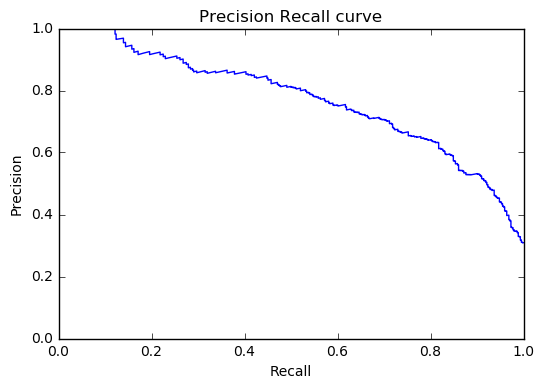

In [46]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(dftest['Stable'], y_pred[:,1])
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall curve')

In [48]:
for i in range(0,len(recall), 40):
    print("Threshold {0}, Precision = {1}, Recall = {2}".format(thresholds[i], precision[i], recall[i]))

Threshold 0.0038412574213, Precision = 0.308977035491, Recall = 1.0
Threshold 0.00611464725807, Precision = 0.316392269148, Recall = 0.995495495495
Threshold 0.00872475653887, Precision = 0.324981577008, Recall = 0.993243243243
Threshold 0.0110214632004, Precision = 0.333333333333, Recall = 0.988738738739
Threshold 0.0141994934529, Precision = 0.342991386061, Recall = 0.986486486486
Threshold 0.0170942246914, Precision = 0.350848827809, Recall = 0.977477477477
Threshold 0.0206256583333, Precision = 0.360902255639, Recall = 0.972972972973
Threshold 0.0258589554578, Precision = 0.373379429559, Recall = 0.972972972973
Threshold 0.0320617742836, Precision = 0.384959713518, Recall = 0.968468468468
Threshold 0.0401866622269, Precision = 0.397400185701, Recall = 0.963963963964
Threshold 0.0472376160324, Precision = 0.411764705882, Recall = 0.961711711712
Threshold 0.055818554014, Precision = 0.42627883651, Recall = 0.957207207207
Threshold 0.0652203410864, Precision = 0.440961337513, Recall =

In [34]:
quant = np.arange(0.01, 1.0, 0.01)*100
prob_Stable = np.percentile(Stable,quant)

quant_f = interp1d(prob_Stable, quant)
prob_f=interp1d(quant, prob_Stable)

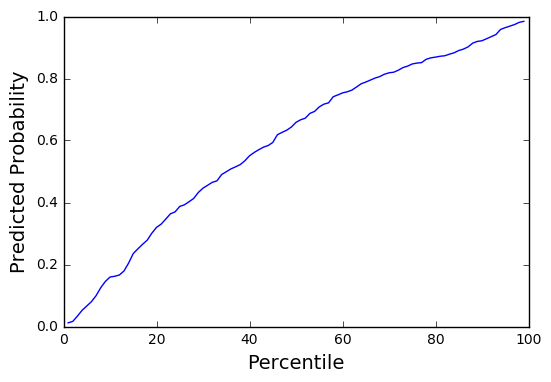

In [35]:
fig, ax = plt.subplots()
plt.plot(quant, prob_Stable)
ax.set_xlabel('Percentile', fontsize=14)
ax.set_ylabel('Predicted Probability', fontsize=14)
plt.show()

In [37]:
_tv = []
_accv = []
_accnormv = []
for i, thresh in enumerate(prob_Stable):
    _loc_yes = Stable >= thresh
    _loc_no = Unstable >= thresh
    _yes = Stable[_loc_yes].shape[0]
    _no = Unstable[_loc_no].shape[0]
    _total = _yes + _no
    if i % 5 == 0:
        print(thresh, _yes*100 / _total)
    _tv.append(thresh)
    _accv.append(_yes*100/_total)
#    _accnormv.append(_yes / Stable.shape[0] / (_yes / Stable.shape[0] + _no / Unstable.shape[0]))
_tv = np.asarray(_tv)
_accv = np.asarray(_accv)
#_accnormv = np.asarray(_accnormv)

(0.011747720669955015, 33)
(0.079912357330322287, 46)
(0.16199764385819435, 52)
(0.25064994275569918, 59)
(0.33018910586833961, 64)
(0.39256731867790223, 66)
(0.45565427839756023, 71)
(0.50832029581069949, 73)
(0.56136916100978851, 75)
(0.61862298250198366, 78)
(0.6668562018871308, 81)
(0.71722491025924684, 84)
(0.75701809287071242, 85)
(0.79495857596397401, 85)
(0.82019906878471383, 86)
(0.84968152999877922, 90)
(0.87178910374641416, 92)
(0.89482335448265082, 95)
(0.92838658750057212, 100)
(0.96896204948425302, 100)


Pred prob for 90 percent accuracy: 0.839913
Pred prob for 80 percent accuracy: 0.643418


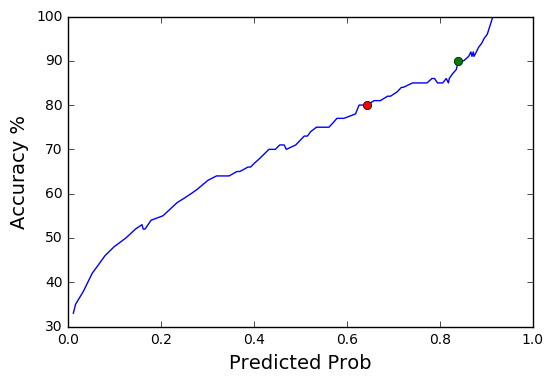

To obtain 90 percent accuracy need to go to 74 quantile
To obtain 80 percent accuracy need to go to 49 quantile


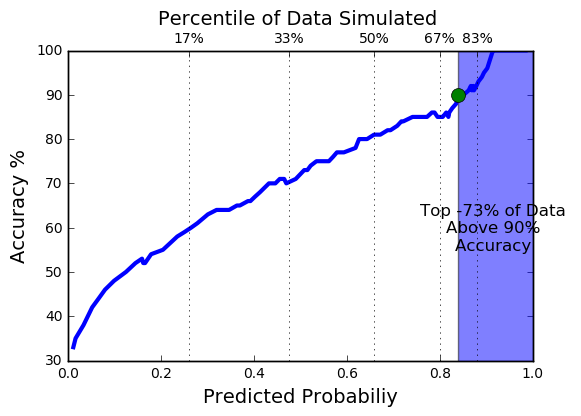

In [38]:
# Find 90% accuracy:
# calculate fit
thr_f = interp1d(_accv, _tv)

# calculate new x's and y's
thresh_fit = thr_f(_accv)
thresh_90=thr_f(90)
thresh_80=thr_f(80)

print('Pred prob for 90 percent accuracy: %f' % thresh_90)
print('Pred prob for 80 percent accuracy: %f' % thresh_80)

fig, ax1 = plt.subplots()
plt.plot(_tv, _accv , thresh_90, 90, 'o', thresh_80, 80, 'o')

ax1.set_xlabel('Predicted Prob', fontsize=14)
ax1.set_ylabel('Accuracy %', fontsize=14)
plt.show()

# calculate new x's and y's
quant_fit = quant_f(prob_Stable)
quant_acc90=quant_f(thresh_90)
quant_acc80=quant_f(thresh_80)
print('To obtain 90 percent accuracy need to go to %1.f quantile' % quant_acc90)
print('To obtain 80 percent accuracy need to go to %1.f quantile' % quant_acc80)


fig, ax1 = plt.subplots()
#plt.plot(f(_tv),_accv *100., f(thresh_90),0.9*100., 'o', markersize=10, color=orangeWCN, LineWidth=3)
ax1.plot(_tv,_accv, thresh_90, 90, 'o', markersize=10,  lw=3, zorder=60)
ax1.set_xlabel('Predicted Probabiliy', fontsize=14)

ax1.set_ylabel('Accuracy %', fontsize=14)
ay2 = ax1.twiny()

# setting grid:
#plt.grid()
xticks=prob_f(np.array([0.167, 0.333, 0.5, 0.667, 0.833])*100)
xlabels=['17%', '33%', '50%', '67%','83%']


ay2.xaxis.grid(True, which='major', zorder=50)

ay2.set_xlabel('Percentile of Data Simulated ' , fontsize=14)
ay2.set_xlim(ax1.get_xlim())
ay2.set_xticks(xticks, minor=False)
ay2.set_xticklabels(xlabels)



ax1.axvspan(thresh_90, 1, alpha=0.5, zorder=20)
legend = ax1.text((1-thresh_90)/2+thresh_90, 55, 'Top %.0f%% of Data \nAbove 90%% \nAccuracy ' %((1-quant_f(thresh_90))),
                  fontsize=12, ha='center', zorder=40)

